In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [3]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"


#### Document last run date

In [4]:
print('TIMESTAMP for last run of this script:')
print(dt.datetime.utcnow())

TIMESTAMP for last run of this script:
2018-03-20 20:49:59.804110


#### Current runs for implementation

In [5]:
runs = [
    'run_0070'
]

#### Check that all run files are up-to-date

In [6]:
for r in runs:
    run = RunManager('StatArbStrategy', r, test_periods=0)
    run.import_return_frame()
    print('{} - {}'.format(r, run.returns.index[-1]))

run_0070 - 2018-03-16 00:00:00


#### Import

In [7]:
drop_params = []

comb = CombinationSearch(write_flag=True)
comb.params['training_epochs'] = 20

for r in runs:
    comb.add_run(RunManager('StatArbStrategy', r, 
                            test_periods=0, start_year=2009, drop_params=drop_params))

In [8]:
comb.start()

Reading and aggregating runs...
Finished aggregating runs...

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Writing run as: CombinationSearch_20180320205022
Max date: 2018-03-16
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



100%|██████████| 20/20 [03:27<00:00, 10.64s/it]


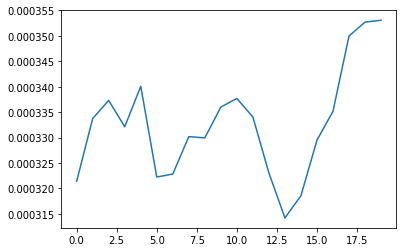

In [9]:
plt.figure()
plt.plot(comb.epoch_stats.Mean)
plt.show()

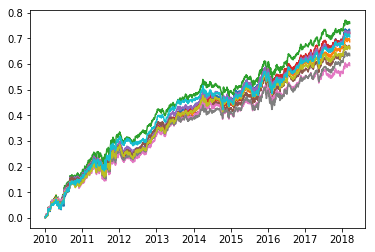

In [10]:
plt.figure()
plt.plot(comb.best_results_returns.cumsum())
plt.show()

In [11]:
df = rollup_returns(comb.best_results_returns)
df['year'] = df.sum(axis=1)
df

Qtr,1,2,3,4,year
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.061298,-0.007686,0.082594,0.014600,0.150805
2011,0.050105,0.003835,-0.003208,0.079134,0.129866
2012,-0.028774,-0.001213,0.019749,0.069736,0.059497
2013,-0.003042,0.047604,0.039028,0.006172,0.089762
2014,0.056339,-0.016690,-0.023133,0.016346,0.032863
2015,0.028950,0.029038,-0.019436,0.068583,0.107134
2016,-0.012815,0.016700,0.003883,0.040891,0.048659
2017,0.022578,0.024026,0.002237,0.025233,0.074074


In [12]:
df.year.mean()

0.081007304061122831